In [40]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#helps with conditional indexing
import numpy as np

In [3]:
datasetInitial = pd.read_csv('FastFoodNutritionFacts.csv')

In [4]:
datasetInitial.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [5]:
#looked up calorie count for burgerking farmhouse king to fill the only null in "protein" column
datasetInitial.loc[205, "protein"] = 63

In [6]:
#dropping the fiber, vitamin-a and -c, calcium, and salad columns because they have either a lot of nulls or are not needed

colToDrop = ["fiber","vit_a","vit_c","calcium","salad"]

#creates new, updated dataset. this one will have no nulls
df = datasetInitial.drop(columns = colToDrop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  sugar        515 non-null    int64  
 11  protein      515 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 48.4+ KB


In [7]:
mcdAvgCalories = np.mean(df.loc[df["restaurant"] == "Mcdonalds" , "calories"])
mcdAvgCalories

640.3508771929825

In [8]:
avg = df[df.loc[:, "restaurant"] == "Mcdonalds"]["calories"].mean()

avg

640.3508771929825

In [14]:
restaurants = df["restaurant"].value_counts()
restaurants

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

In [53]:
difRes = ["Taco Bell","Subway","Burger King","Mcdonalds","Arbys","Sonic","Dairy Queen","Chick Fil-A"]

mins = {
    "restaurant": difRes,
    "calories":[],
    "cal_fat":[],
    "total_fat":[],
    "sat_fat":[],
    "trans_fat":[],
    "cholesterol":[],
    "sodium":[],
    "total_carb":[],
    "sugar":[],
    "protein":[]
}

maxs = {
    "restaurant": difRes,
    "calories":[],
    "cal_fat":[],
    "total_fat":[],
    "sat_fat":[],
    "trans_fat":[],
    "cholesterol":[],
    "sodium":[],
    "total_carb":[],
    "sugar":[],
    "protein":[]
}

meds = {
    "restaurant": difRes,
    "calories":[],
    "cal_fat":[],
    "total_fat":[],
    "sat_fat":[],
    "trans_fat":[],
    "cholesterol":[],
    "sodium":[],
    "total_carb":[],
    "sugar":[],
    "protein":[]
}

for i in range(len(difRes)):
     for col in avgs:
        if col != "restaurant":
            mins[col].append(round(df[df.loc[:, "restaurant"] == difRes[i]][col].min(), 3))
            maxs[col].append(round(df[df.loc[:, "restaurant"] == difRes[i]][col].max(), 3))
            meds[col].append(round(df[df.loc[:, "restaurant"] == difRes[i]][col].median(), 3))
            

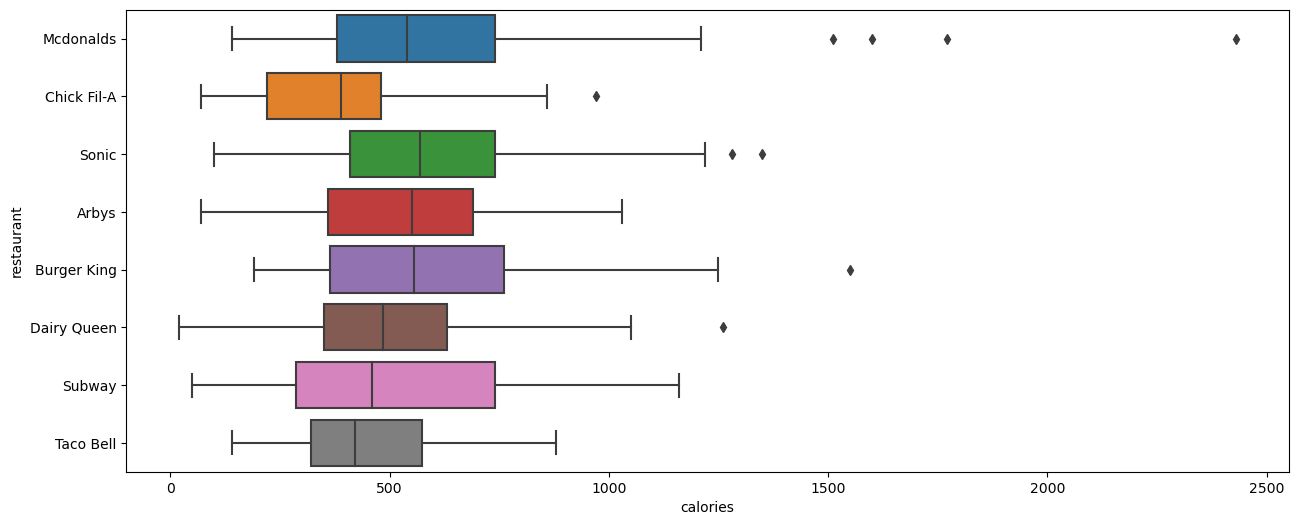

In [61]:
plt.figure(figsize = (15,6))
sb.boxplot(data=df, y="restaurant", x="calories")

plt.show()

In [66]:

df[df.loc[:,"calories"] == df[df.loc[:,"restaurant"] == "Mcdonalds"]["calories"].max()]["item"]

39    20 piece Buttermilk Crispy Chicken Tenders
Name: item, dtype: object